In [22]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [24]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [25]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [26]:
tf.keras.backend.clear_session()

In [27]:
subject = 'Piauí - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [28]:
data = pd.read_csv('2003_raw_Piauí_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - População,Piauí - INCC (%),Piauí - IPCA - Variação mensal durante o Plano Real (%),Piauí - IGP-DI,Piauí - Taxa Selic (%),Piauí - IDH - Longevidade,Piauí - IDH - Renda,Piauí - IDH - Educação,Piauí - NFSP - Fluxo Mensal (Milhões de reais),Piauí - Estoque liquido de capital fixo - (R$),Piauí - Desemprego,Piauí - Produção de Cimento (t),Piauí - Valor,Piauí - Consumo de Cimento (t)
0,2003-01-01,9.984673e+05,5.255794e+05,0.344510,9.103684e+05,2898223.0,1.70,12.53,2.70,0.082293,0.676,0.556,0.301,3.46,6.098524e+06,5.904791,NaN,NaN,21844.0
1,2003-02-01,9.984673e+05,5.255794e+05,0.344510,9.103684e+05,2898223.0,1.51,2.25,2.17,0.088771,0.676,0.556,0.301,3.59,6.172460e+06,5.904791,33959.0,NaN,15814.0
2,2003-03-01,9.984673e+05,5.255794e+05,0.344510,9.103684e+05,2898223.0,1.39,3.86,1.59,0.090733,0.676,0.556,0.301,3.84,6.172460e+06,5.904791,55278.0,NaN,16067.0
3,2003-04-01,9.984673e+05,5.255794e+05,0.344510,9.103684e+05,2898223.0,1.38,5.13,1.66,0.092749,0.676,0.556,0.301,3.95,6.172460e+06,5.904791,120530.0,NaN,14938.0
4,2003-05-01,9.984673e+05,5.255794e+05,0.344510,9.103684e+05,2898223.0,0.90,6.15,0.41,0.092758,0.676,0.556,0.301,4.06,6.172460e+06,5.904791,44601.0,NaN,17765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,2.207256e+06,3.724396e+06,0.677905,1.463225e+06,3264531.0,0.58,2.42,-0.01,0.024620,0.770,0.660,0.670,0.69,7.827728e+06,12.300000,273251.0,NaN,68642.0
200,2019-09-01,2.207256e+06,3.724396e+06,0.677905,1.463225e+06,3264531.0,0.42,2.54,-0.51,0.022751,0.770,0.660,0.670,0.62,7.827728e+06,12.000000,NaN,NaN,64741.0
201,2019-10-01,2.207256e+06,3.724396e+06,0.677905,1.463225e+06,3264531.0,0.46,2.49,0.50,0.022035,0.770,0.660,0.670,0.59,7.827728e+06,11.900000,62771.0,NaN,71269.0
202,2019-11-01,2.207256e+06,3.724396e+06,0.677905,1.463225e+06,3264531.0,0.18,2.60,0.55,0.020790,0.770,0.660,0.670,0.57,7.827728e+06,11.700000,17759.0,NaN,67631.0


In [29]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      19.758
1      19.763
2      22.445
3      20.109
4      24.283
        ...  
199       NaN
200       NaN
201       NaN
202       NaN
203       NaN
Name: Piauí - Consumo de Cimento (t), Length: 204, dtype: float64

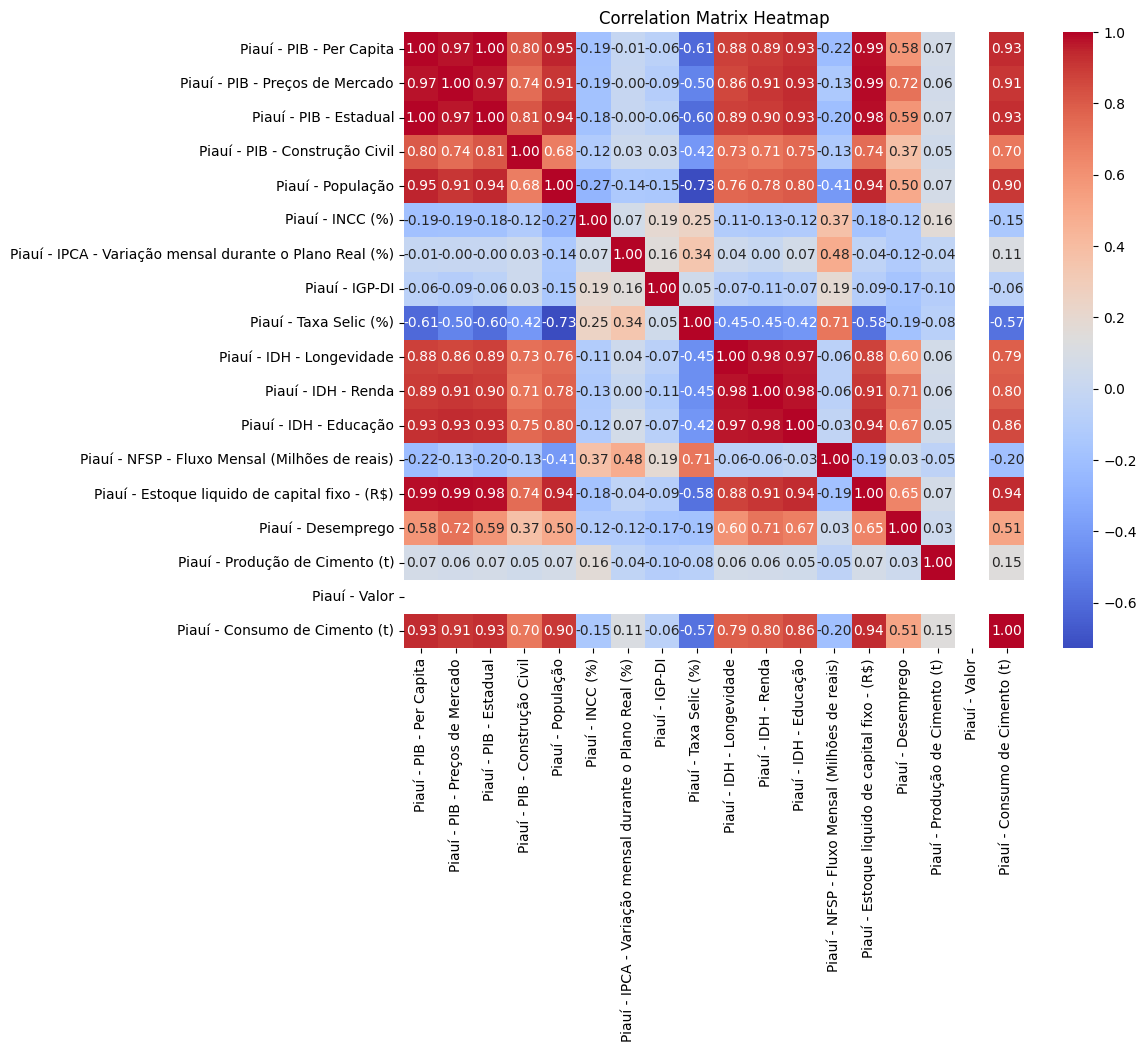

In [30]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [31]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(0.0)
input_data

,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - População,Piauí - INCC (%),Piauí - IPCA - Variação mensal durante o Plano Real (%),Piauí - IGP-DI,Piauí - Taxa Selic (%),Piauí - IDH - Longevidade,Piauí - IDH - Renda,Piauí - IDH - Educação,Piauí - NFSP - Fluxo Mensal (Milhões de reais),Piauí - Estoque liquido de capital fixo - (R$),Piauí - Desemprego,Piauí - Produção de Cimento (t),Piauí - Valor
0,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,1.998868,4.052332,3.466715,2.303195,-0.930077,-0.917311,-0.921286,3.108599,-1.539424,-0.348929,0.000000,0.0
1,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,1.647487,-0.596188,2.630940,2.745235,-0.930077,-0.917311,-0.921286,3.275709,-1.411460,-0.348929,-0.448058,0.0
2,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,1.425561,0.131839,1.716318,2.879123,-0.930077,-0.917311,-0.921286,3.597074,-1.411460,-0.348929,-0.377367,0.0
3,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,1.407068,0.706121,1.826703,3.016721,-0.930077,-0.917311,-0.921286,3.738475,-1.411460,-0.348929,-0.161000,0.0
4,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,0.519367,1.167355,-0.144465,3.017322,-0.930077,-0.917311,-0.921286,3.879875,-1.411460,-0.348929,-0.412770,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.181646,1.736278,1.150489,0.442005,1.217711,-0.590259,-0.966985,-1.264088,-0.729479,1.112616,1.750379,1.281225,-0.374997,1.441346,3.140665,0.103801,0.0
176,1.181646,1.736278,1.150489,0.442005,1.217711,-0.479297,-0.881068,-0.412544,-0.941281,1.112616,1.750379,1.281225,-0.439270,1.441346,3.140665,-0.444908,0.0
177,1.181646,1.736278,1.150489,0.442005,1.217711,-1.034110,-0.808718,0.186692,-1.140710,1.112616,1.750379,1.281225,-0.503543,1.441346,3.140665,-0.252684,0.0
178,1.181646,1.736278,1.150489,0.442005,1.217711,-0.571766,-0.614276,-0.633314,-1.226481,1.112616,1.750379,1.281225,-0.503543,1.441346,3.198872,-0.490676,0.0


In [32]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - População,Piauí - INCC (%),Piauí - IPCA - Variação mensal durante o Plano Real (%),Piauí - IGP-DI,Piauí - Taxa Selic (%),Piauí - IDH - Longevidade,Piauí - IDH - Renda,Piauí - IDH - Educação,Piauí - NFSP - Fluxo Mensal (Milhões de reais),Piauí - Estoque liquido de capital fixo - (R$),Piauí - Desemprego,Piauí - Produção de Cimento (t),Piauí - Valor
0,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,1.998868,4.052332,3.466715,2.303195,-0.930077,-0.917311,-0.921286,3.108599,-1.539424,-0.348929,0.000000,0.0
1,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,1.647487,-0.596188,2.630940,2.745235,-0.930077,-0.917311,-0.921286,3.275709,-1.411460,-0.348929,-0.448058,0.0
2,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,1.425561,0.131839,1.716318,2.879123,-0.930077,-0.917311,-0.921286,3.597074,-1.411460,-0.348929,-0.377367,0.0
3,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,1.407068,0.706121,1.826703,3.016721,-0.930077,-0.917311,-0.921286,3.738475,-1.411460,-0.348929,-0.161000,0.0
4,-1.458365,-1.269398,-1.413446,-0.862563,-1.918825,0.519367,1.167355,-0.144465,3.017322,-0.930077,-0.917311,-0.921286,3.879875,-1.411460,-0.348929,-0.412770,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.316062,1.548174,1.312496,1.121026,1.136270,-0.238878,0.629248,-1.406012,0.272188,1.112616,0.931352,1.281225,0.794771,1.416222,1.394474,0.000000,0.0
164,1.316062,1.548174,1.312496,1.121026,1.136270,-0.608753,0.837256,-0.112926,0.272188,1.112616,0.931352,1.281225,0.730498,1.416222,1.452680,0.000000,0.0
165,1.316062,1.548174,1.312496,1.121026,1.136270,-0.534778,0.877953,-0.743700,0.272188,1.112616,0.931352,1.281225,0.743353,1.416222,1.510887,0.000000,0.0
166,1.316062,1.548174,1.312496,1.121026,1.136270,-0.756703,1.000045,-0.586006,0.248413,1.112616,0.931352,1.281225,0.614807,1.416222,1.510887,0.000000,0.0


In [33]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      19.758
1      19.763
2      22.445
3      20.109
4      24.283
        ...  
163    63.141
164    55.580
165    60.001
166    62.767
167    45.308
Name: Piauí - Consumo de Cimento (t), Length: 168, dtype: float64

In [34]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [35]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [36]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - População,Piauí - INCC (%),Piauí - IPCA - Variação mensal durante o Plano Real (%),Piauí - IGP-DI,Piauí - Taxa Selic (%),Piauí - IDH - Longevidade,Piauí - IDH - Renda,Piauí - IDH - Educação,Piauí - NFSP - Fluxo Mensal (Milhões de reais),Piauí - Estoque liquido de capital fixo - (R$),Piauí - Desemprego,Piauí - Produção de Cimento (t),Piauí - Valor
132,0.880423,0.840819,0.870623,0.618938,0.937841,-0.960135,1.058830,0.297077,-0.755853,0.895308,0.931352,1.151283,-0.285015,0.834026,0.463172,-0.417840,0.0
133,0.880423,0.840819,0.870623,0.618938,0.937841,0.482379,-1.364912,-0.160234,-0.688658,0.895308,0.931352,1.151283,-0.349288,1.129318,0.754204,0.000000,0.0
134,0.880423,0.840819,0.870623,0.618938,0.937841,-0.534778,-1.052901,0.549386,-0.626634,0.895308,0.931352,1.151283,-0.374997,1.129318,0.928823,0.000000,0.0
135,0.880423,0.840819,0.870623,0.618938,0.937841,-0.627247,-0.627842,1.542855,-0.571481,0.895308,0.931352,1.151283,-0.259306,1.129318,0.812410,0.000000,0.0
136,0.880423,0.840819,0.870623,0.618938,0.937841,0.482379,-0.320352,-0.081387,-0.516512,0.895308,0.931352,1.151283,-0.053632,1.129318,0.695997,-0.184357,0.0
137,0.880423,0.840819,0.870623,0.618938,0.937841,2.646150,-0.107822,-1.500628,-0.510405,0.895308,0.931352,1.151283,0.023495,1.129318,0.579584,0.000000,0.0
138,0.880423,0.840819,0.870623,0.618938,0.937841,0.075516,0.082098,-1.784477,-0.510405,0.895308,0.931352,1.151283,-0.002214,1.129318,0.521378,0.000000,0.0
139,0.880423,0.840819,0.870623,0.618938,0.937841,0.241960,0.086620,-1.658322,-0.510405,0.895308,0.931352,1.151283,-0.143614,1.129318,0.404965,0.000000,0.0
140,0.880423,0.840819,0.870623,0.618938,0.937841,-0.997122,0.204189,-0.696392,-0.510054,0.895308,0.931352,1.151283,-0.182178,1.129318,0.288552,-0.416560,0.0
141,0.880423,0.840819,0.870623,0.618938,0.937841,-0.867666,0.470982,-0.759469,-0.510405,0.895308,0.931352,1.151283,-0.105051,1.129318,0.172140,0.000000,0.0


In [37]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [38]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [39]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [40]:
def predictor(model, test_input, test_target, start_target):
    
    predictions = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        if (prediction[0][0] < 0.0):
            return None, None
        predictions.append(prediction[0][0])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    return df_results, predictions

In [41]:
def statistical_validator(train_input, train_target, test_input, test_target, start_target):
    
    pd.set_option('display.max_columns', None)
    predictions_list = []
    error_percent = []
    
    i = 0
    while i < 10:
        winner_seed = get_a_good_seed(train_input, train_target, test_input, test_target)
        trained_model, history = lstm_model(train_input, 
                                            train_target, 
                                            want_verbose=0, 
                                            seed=winner_seed)
        df_results, predictions = predictor(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
        if predictions is not None:
            display(df_results.T)
            predictions_list.append(predictions)
            i += 1
        
    predictions_means = np.mean(predictions_list, axis=0)
    results_data = []
   
    for j in range(12):
        target = test_target[start_target + j]
        error = np.abs(predictions_means[j] - target)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                            predictions_means[j], 
                            target, 
                            error])
    display("FINAL___________________________________________________________________")
    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])
    display(df_results.T)
        
    mae_mean = np.mean(predictions_means)
    mape_mean = np.mean(error_percent) 

    return mae_mean, mape_mean

In [42]:
mae, mape = statistical_validator(reshaped_train, 
                                  reshaped_target, 
                                  reshaped_test, 
                                  reshaped_test_target, 
                                  start_index)

[1909694413, 2606728242, 2087027287, 3004684408, 2024054554, 2640711716, 4217800865, 2450187730, 3994569664, 2620884568]


Step: 0 ___________________________________________
val_loss: 245.31666564941406
winner_seed: 1909694413


Step: 1 ___________________________________________
val_loss: 232.66702270507812
winner_seed: 2606728242


Step: 2 ___________________________________________
val_loss: 132.17311096191406
winner_seed: 2087027287


Step: 3 ___________________________________________
val_loss: 147.49185180664062


Step: 4 ___________________________________________
val_loss: 202.5457763671875


Step: 5 ___________________________________________
val_loss: 275.3805847167969


Step: 6 ___________________________________________
val_loss: 211.03732299804688


Step: 7 ___________________________________________
val_loss: 243.14048767089844


Step: 8 ___________________________________________
val_loss: 250.3638458251953


Step: 9 ___________________________________________
val_loss:

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,52.945412,50.972015,53.528187,56.767044,61.141964,65.024399,70.281639,72.381409,73.198532,73.109093,71.715714,70.163551
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,4.196587,4.689014,10.138187,15.943043,6.078964,8.5504,2.148636,3.73941,8.457535,1.840096,4.084717,7.31855


[3475983177, 3275408935, 4027942047, 1346164320, 4051258463, 3458217458, 3518241528, 1415976733, 4099069371, 1057314324]


Step: 0 ___________________________________________
val_loss: 227.1609649658203
winner_seed: 3475983177


Step: 1 ___________________________________________
val_loss: 182.1145782470703
winner_seed: 3275408935


Step: 2 ___________________________________________
val_loss: 261.9833984375


Step: 3 ___________________________________________
val_loss: 244.82945251464844


Step: 4 ___________________________________________
val_loss: 196.9839324951172


Step: 5 ___________________________________________
val_loss: 182.0056915283203
winner_seed: 3458217458


Step: 6 ___________________________________________
val_loss: 240.4756622314453


Step: 7 ___________________________________________
val_loss: 212.86985778808594


Step: 8 ___________________________________________
val_loss: 240.95468139648438


Step: 9 ___________________________________________
val_loss: 268.2

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,61.8643,63.307304,66.617218,70.158089,72.13063,74.154854,76.651031,78.33165,78.350441,78.164154,77.481606,77.084846
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,4.722301,17.024303,23.227219,29.334087,17.067631,17.680855,8.518028,9.689651,13.609444,6.895157,9.850609,14.239845


[1815877648, 4067025246, 1415717984, 53318403, 3336897049, 2914882064, 673414882, 169178313, 3955537665, 1875836122]


Step: 0 ___________________________________________
val_loss: 192.0065155029297
winner_seed: 1815877648


Step: 1 ___________________________________________
val_loss: 219.9025115966797


Step: 2 ___________________________________________
val_loss: 202.6868438720703


Step: 3 ___________________________________________
val_loss: 229.4486541748047


Step: 4 ___________________________________________
val_loss: 217.81460571289062


Step: 5 ___________________________________________
val_loss: 232.19654846191406


Step: 6 ___________________________________________
val_loss: 271.7462158203125


Step: 7 ___________________________________________
val_loss: 142.91433715820312
winner_seed: 169178313


Step: 8 ___________________________________________
val_loss: 256.901123046875


Step: 9 ___________________________________________
val_loss: 217.8378143310547
1/1 [=========

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,59.386841,56.164303,64.159561,69.09243,70.770546,72.091545,73.455208,75.219711,75.954674,76.208488,76.101311,75.716515
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,2.244843,9.881302,20.769562,28.268429,15.707546,15.617546,5.322205,6.577713,11.213676,4.939491,8.470314,12.871513


[637649146, 4209700897, 2844345886, 2845790801, 3105044312, 3705236352, 3163822963, 3633691, 938253039, 3613287712]


Step: 0 ___________________________________________
val_loss: 238.51539611816406
winner_seed: 637649146


Step: 1 ___________________________________________
val_loss: 237.46664428710938
winner_seed: 4209700897


Step: 2 ___________________________________________
val_loss: 164.1149139404297
winner_seed: 2844345886


Step: 3 ___________________________________________
val_loss: 192.15774536132812


Step: 4 ___________________________________________
val_loss: 227.8660125732422


Step: 5 ___________________________________________
val_loss: 245.51455688476562


Step: 6 ___________________________________________
val_loss: 202.85879516601562


Step: 7 ___________________________________________
val_loss: 255.33958435058594


Step: 8 ___________________________________________
val_loss: 237.68765258789062


Step: 9 ___________________________________________
val_loss: 184.

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,62.548248,63.588642,65.8153,67.902969,68.545593,69.699234,72.185776,72.872894,73.675278,74.666374,74.84964,74.881195
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,5.40625,17.305641,22.425301,27.078968,13.482594,13.225235,4.052773,4.230896,8.93428,3.397377,7.218643,12.036194


[3708259554, 3157403905, 152186334, 365887577, 2235977483, 865530876, 3104664382, 1804725120, 902526348, 1890624110]


Step: 0 ___________________________________________
val_loss: 202.36903381347656
winner_seed: 3708259554


Step: 1 ___________________________________________
val_loss: 149.26307678222656
winner_seed: 3157403905


Step: 2 ___________________________________________
val_loss: 183.18307495117188


Step: 3 ___________________________________________
val_loss: 229.69082641601562


Step: 4 ___________________________________________
val_loss: 200.9408416748047


Step: 5 ___________________________________________
val_loss: 206.48388671875


Step: 6 ___________________________________________
val_loss: 155.46810913085938


Step: 7 ___________________________________________
val_loss: 235.2152557373047


Step: 8 ___________________________________________
val_loss: 83.09083557128906
winner_seed: 902526348


Step: 9 ___________________________________________
val_loss: 246.857

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,39.884701,34.727722,37.19593,45.34259,49.843914,51.995934,54.718708,57.170246,70.52623,63.124916,63.264198,62.744732
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,17.257298,11.555279,6.194069,4.518589,5.219086,4.478065,13.414295,11.471752,5.785233,8.144081,4.366798,0.100269


[1837040762, 480431610, 4119564318, 1036063103, 1936136603, 361802991, 3197414958, 1040584040, 1437264845, 998131157]


Step: 0 ___________________________________________
val_loss: 232.8711700439453
winner_seed: 1837040762


Step: 1 ___________________________________________
val_loss: 218.20797729492188
winner_seed: 480431610


Step: 2 ___________________________________________
val_loss: 243.65420532226562


Step: 3 ___________________________________________
val_loss: 226.03465270996094


Step: 4 ___________________________________________
val_loss: 149.5199737548828
winner_seed: 1936136603


Step: 5 ___________________________________________
val_loss: 208.13734436035156


Step: 6 ___________________________________________
val_loss: 348.4344177246094


Step: 7 ___________________________________________
val_loss: 137.3315887451172
winner_seed: 1040584040


Step: 8 ___________________________________________
val_loss: 216.1363525390625


Step: 9 ___________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,59.844425,57.005848,59.769505,64.522552,69.300522,72.176163,75.099304,78.414246,79.50383,80.231171,80.12645,79.413956
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,2.702427,10.722847,16.379505,23.698551,14.237522,15.702164,6.966301,9.772247,14.762833,8.962173,12.495453,16.568954


[3005001476, 2275995742, 2376691303, 1644880434, 1506280142, 1701909260, 3208639309, 403334898, 1074319704, 2680297850]


Step: 0 ___________________________________________
val_loss: 235.47120666503906
winner_seed: 3005001476


Step: 1 ___________________________________________
val_loss: 253.2609100341797


Step: 2 ___________________________________________
val_loss: 123.94066619873047
winner_seed: 2376691303


Step: 3 ___________________________________________
val_loss: 216.29190063476562


Step: 4 ___________________________________________
val_loss: 233.5264434814453


Step: 5 ___________________________________________
val_loss: 227.5489959716797


Step: 6 ___________________________________________
val_loss: 227.4373779296875


Step: 7 ___________________________________________
val_loss: 242.5491943359375


Step: 8 ___________________________________________
val_loss: 293.3987121582031


Step: 9 ___________________________________________
val_loss: 216.1819305419922
1/1 [====

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,56.697792,54.430901,58.414146,63.506565,67.11647,69.858467,72.0224,72.960724,73.447281,74.054779,74.305557,74.573555
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,0.444206,8.1479,15.024147,22.682564,12.053471,13.384468,3.889397,4.318726,8.706284,2.785782,6.674561,11.728554


[3771869444, 2126510054, 2832719737, 2150482266, 4288593197, 4228879075, 2856837080, 1955013494, 4236029517, 580640991]


Step: 0 ___________________________________________
val_loss: 202.74293518066406
winner_seed: 3771869444


Step: 1 ___________________________________________
val_loss: 175.644287109375
winner_seed: 2126510054


Step: 2 ___________________________________________
val_loss: 143.2880401611328
winner_seed: 2832719737


Step: 3 ___________________________________________
val_loss: 215.60226440429688


Step: 4 ___________________________________________
val_loss: 154.49525451660156


Step: 5 ___________________________________________
val_loss: 253.49636840820312


Step: 6 ___________________________________________
val_loss: 231.85536193847656


Step: 7 ___________________________________________
val_loss: 219.69503784179688


Step: 8 ___________________________________________
val_loss: 229.62306213378906


Step: 9 ___________________________________________
val_loss: 

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,57.572441,59.76236,62.718498,66.953011,68.316643,68.86525,71.957115,73.748489,73.985558,73.448097,73.195671,73.066139
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,0.430443,13.479359,19.328499,26.129009,13.253643,12.391251,3.824112,5.106491,9.24456,2.1791,5.564674,10.221138


[1152680903, 1979077521, 692006782, 3813809673, 497253708, 1641176063, 1189025545, 194447971, 1225975383, 2009907317]


Step: 0 ___________________________________________
val_loss: 201.33216857910156
winner_seed: 1152680903


Step: 1 ___________________________________________
val_loss: 198.3089141845703
winner_seed: 1979077521


Step: 2 ___________________________________________
val_loss: 197.03616333007812
winner_seed: 692006782


Step: 3 ___________________________________________
val_loss: 230.64198303222656


Step: 4 ___________________________________________
val_loss: 205.6023712158203


Step: 5 ___________________________________________
val_loss: 236.7609405517578


Step: 6 ___________________________________________
val_loss: 260.17333984375


Step: 7 ___________________________________________
val_loss: 244.515380859375


Step: 8 ___________________________________________
val_loss: 191.22206115722656
winner_seed: 1225975383


Step: 9 ______________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,64.036598,60.974159,60.393684,60.404472,65.771385,70.056473,74.073875,76.249283,75.970047,75.92141,74.848892,74.130981
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,6.8946,14.691158,17.003685,19.580471,10.708385,13.582474,5.940872,7.607285,11.22905,4.652412,7.217896,11.28598


[1545942132, 508248455, 620167413, 2648521841, 597063645, 3983328313, 1725295789, 669968434, 1026276692, 3044363354]


Step: 0 ___________________________________________
val_loss: 163.7771453857422
winner_seed: 1545942132


Step: 1 ___________________________________________
val_loss: 77.74919891357422
winner_seed: 508248455


Step: 2 ___________________________________________
val_loss: 177.5191650390625


Step: 3 ___________________________________________
val_loss: 261.1156311035156


Step: 4 ___________________________________________
val_loss: 239.3802032470703


Step: 5 ___________________________________________
val_loss: 251.458740234375


Step: 6 ___________________________________________
val_loss: 161.49465942382812


Step: 7 ___________________________________________
val_loss: 216.9630584716797


Step: 8 ___________________________________________
val_loss: 284.036376953125


Step: 9 ___________________________________________
val_loss: 223.5291290283203
1/1 [============

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,51.270756,49.980289,56.393192,63.077091,65.937744,66.924706,67.732178,69.107758,69.538689,70.124893,70.305275,69.93631
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,5.871243,3.697289,13.003193,22.25309,10.874744,10.450706,0.400826,0.465759,4.797691,1.144104,2.674278,7.091309


'FINAL___________________________________________________________________'

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11
Prediction,56.605152,55.091358,58.500526,62.772682,65.887535,68.084702,70.817726,72.645645,74.415054,73.905334,73.619431,73.171181
Target,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,0.536848,8.808358,15.110526,21.948682,10.824535,11.610702,2.684726,4.003645,9.674054,2.636334,5.988431,10.326181


In [43]:
display(mae)
display(mape)

67.126366

0.16873214149521154